### Problem statement

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

Out of portential churning customer, retaining those customer who generates high revenue is main business goal here.

#### Steps will be as follow:-

1. Data understanding, preparation & pre-processing
2. EDA
3. Feature engineering and variable transformation
4. Train/Test Split
5. Model evaluation
6. Model selection, model training, Prediction
7. Model improvement

#### 1. Data collection

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing model related libs
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Import PCA
from sklearn.decomposition import PCA 

In [3]:
# Reading dataset
raw_df = pd.read_csv('train.csv')

#### 2. Data understanding, preparation & pre-processing

In [4]:
raw_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


##### Let's understand the data structure, columns and data types.

In [5]:
raw_df.shape

(69999, 172)

In [6]:
raw_df.columns.values

array(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8

In [7]:
raw_df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [9]:
raw_df.isnull().sum().sort_values(ascending=False)

arpu_3g_6                   52431
count_rech_2g_6             52431
night_pck_user_6            52431
arpu_2g_6                   52431
date_of_last_rech_data_6    52431
                            ...  
last_day_rch_amt_8              0
vol_2g_mb_6                     0
vol_2g_mb_7                     0
vol_2g_mb_8                     0
churn_probability               0
Length: 172, dtype: int64

In [10]:
# Handling null/missing values (in percent)
df_missing_cols = (round(((raw_df.isnull().sum()/len(raw_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)

#List all those columns which have signficant null entry (random set more than 60%)
col_list_missing_60 = list(df_missing_cols.index[df_missing_cols['null'] > 60])
len(col_list_missing_60)

30

### Data Cleaning

##### Droping columns which can be noise in this analysis

In [11]:
# dropping all columns which are more values with empty
clean_df = raw_df.drop(col_list_missing_60, axis=1)
#Removing missing values 
clean_df.dropna(inplace = True)
clean_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [12]:
# check again null entry on clean_df
df_missing_cols = (round(((clean_df.isnull().sum()/len(clean_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_cols.shape

(142, 1)

In [13]:
clean_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [14]:
## Let's understand feature uniqueness
clean_df.nunique()

id                   61895
circle_id                1
loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
                     ...  
aon                   3447
aug_vbc_3g           10005
jul_vbc_3g            9523
jun_vbc_3g            8809
churn_probability        2
Length: 142, dtype: int64

In [15]:
# Columns with same value should be dropped , since these columns will have no impact
df_unique_with_one_val = [i for i in clean_df.columns if clean_df[i].nunique()==1]
print(df_unique_with_one_val)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [16]:
# Dropping columns with same value should be dropped, since these columns will have no impact
clean_df = clean_df.drop(df_unique_with_one_val, axis=1)

In [17]:
# Let's understand each columns to put some assumption and categorising variables
clean_df.columns.values

array(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_

As stated, we need to identify and target customers who are high revenue generating out of all churning customers.

From the given dataset, Understanding behavior of customer in the month June, July and Aug.

In [18]:
# Filter premium customer (high revenue generating customer)
clean_df['avg_rech_amt_6_7'] = (clean_df['total_rech_amt_6'] + clean_df['total_rech_amt_7'])/2

In [19]:
df_des =clean_df['avg_rech_amt_6_7'].describe()
df_des

count    61895.000000
mean       342.567687
std        385.476672
min          0.000000
25%        125.000000
50%        245.000000
75%        440.000000
max      37762.500000
Name: avg_rech_amt_6_7, dtype: float64

In [20]:
# Let's analyse quantile for the same
clean_df['avg_rech_amt_6_7'].quantile([0.4,0.5,0.6,0.7,0.99,1])

0.40      192.0
0.50      245.0
0.60      307.0
0.70      388.0
0.99     1614.5
1.00    37762.5
Name: avg_rech_amt_6_7, dtype: float64

In [21]:
# Filter customer who has recharged more than AR
clean_df = clean_df[clean_df['avg_rech_amt_6_7'] >= clean_df['avg_rech_amt_6_7'].quantile(0.5)]
clean_df.shape

(31028, 130)

In [22]:
# Check for null/missing values
df_missing_rows = clean_df[(clean_df.isnull())]
df_missing_rows.shape

(31028, 130)

In [23]:
# fullproof for other dataset, we should drop all rows which have 50% or more rows are null
clean_df_missing_rows_50 = clean_df[(clean_df.isnull().sum(axis=1)) > (len(clean_df.columns)//2)]
# Deleting the rows having more than 50% missing values
clean_df = clean_df.drop(clean_df_missing_rows_50.index)
clean_df.shape

(31028, 130)

In [24]:
# Checking the missing values in columns again
df_missing_cols = (round(((clean_df.isnull().sum()/len(clean_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_cols

,null
id,0.0
max_rech_amt_6,0.0
total_rech_amt_7,0.0
total_rech_amt_6,0.0
total_rech_num_8,0.0
...,...
std_og_t2f_mou_7,0.0
std_og_t2f_mou_6,0.0
std_og_t2m_mou_8,0.0
std_og_t2m_mou_7,0.0


In [25]:
clean_df.columns.values

array(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_

In [26]:
# Churning customer records

clean_df['churn'] = np.where((clean_df['total_ic_mou_8']==0) & (clean_df['total_og_mou_8']==0) & (clean_df['vol_2g_mb_8']==0) & (clean_df['vol_3g_mb_8']==0), 1, 0)

#### Outlier treatment

In [27]:
numeric_features= [i for i in clean_df.columns if 'object' not in clean_df[i].dtype.name]
numeric_features

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

In [28]:
clean_df.shape

(31028, 131)

In [29]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_features: 
    q1 = clean_df[col].quantile(0.05)
    q3 = clean_df[col].quantile(0.99)
    iqr = q3-q1
    range_low  = q1-1*iqr
    range_high = q3+1*iqr
    # Assigning the filtered dataset into data
    new_clean_df = clean_df.loc[(clean_df[col] > range_low) & (clean_df[col] < range_high)]
    if len(new_clean_df)>0 :
        clean_df = new_clean_df

clean_df.shape

(25777, 131)

In [30]:
# List the columns of total mou, rech_num and rech_amt
[total for total in clean_df.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

Determine customer behavior over the month (June, July and Aug)

In [31]:
# Total mou at good phase incoming and outgoing
clean_df['total_mou_good'] = (clean_df['total_og_mou_6'] + clean_df['total_ic_mou_6'])

In [32]:
# Avg. mou at action phase
# Taking average because there are two months(7 and 8) in action phase
clean_df['avg_mou_aug'] = (clean_df['total_og_mou_7'] + clean_df['total_og_mou_8'] + clean_df['total_ic_mou_7'] + clean_df['total_ic_mou_8'])/2

In [33]:
# Difference avg_mou_good and avg_mouaug
clean_df['diff_mou'] = clean_df['avg_mou_aug'] - clean_df['total_mou_good']

In [34]:
# Checking whether the mou has decreased in action phase
clean_df['decrease_mou_aug'] = np.where((clean_df['diff_mou'] < 0), 1, 0)
clean_df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_aug,diff_mou,decrease_mou_aug
11,11,292.724,228.753,418.233,135.54,63.61,177.36,46.39,65.48,92.81,...,0.0,0.0,0.0,0,315.0,0,315.87,418.140,102.270,0
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,...,0.0,0.0,0.0,0,469.5,0,850.93,792.985,-57.945,1
14,14,340.266,205.397,191.780,123.76,116.34,75.93,98.51,94.11,150.61,...,0.0,0.0,0.0,0,350.0,0,643.39,572.090,-71.300,1
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,0.0,0.0,0.0,0,527.0,0,560.82,1082.825,522.005,0
22,22,277.458,283.346,231.755,179.54,287.98,155.16,335.41,255.18,281.06,...,0.0,0.0,0.0,0,366.0,0,736.52,1045.175,308.655,0


Determine customer behavior based on recharge frequency if decreses/increases

In [35]:
# Avg rech number at aug and take difference of total_rech_num_6 and avg_rech_aug
clean_df['avg_rech_num_aug'] = (clean_df['total_rech_num_7'] + clean_df['total_rech_num_8'])/2
clean_df['diff_rech_num'] = clean_df['avg_rech_num_aug'] - clean_df['total_rech_num_6']

In [36]:
# Checking if rech_num has decreased in action phase
clean_df['decrease_rech_num_aug'] = np.where((clean_df['diff_rech_num'] < 0), 1, 0)
clean_df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_aug,diff_mou,decrease_mou_aug,avg_rech_num_aug,diff_rech_num,decrease_rech_num_aug
11,11,292.724,228.753,418.233,135.54,63.61,177.36,46.39,65.48,92.81,...,0,315.0,0,315.87,418.140,102.270,0,7.0,-3.0,1
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,...,0,469.5,0,850.93,792.985,-57.945,1,15.0,0.0,0
14,14,340.266,205.397,191.780,123.76,116.34,75.93,98.51,94.11,150.61,...,0,350.0,0,643.39,572.090,-71.300,1,2.5,-4.5,1
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,0,527.0,0,560.82,1082.825,522.005,0,3.5,-1.5,1
22,22,277.458,283.346,231.755,179.54,287.98,155.16,335.41,255.18,281.06,...,0,366.0,0,736.52,1045.175,308.655,0,4.0,-2.0,1


In [37]:
# Avg rech_amt in action phase and take difference of action phase rech amt and good phase rech amt
clean_df['avg_rech_amt_aug'] = (clean_df['total_rech_amt_7'] + clean_df['total_rech_amt_8'])/2
clean_df['diff_rech_amt'] = clean_df['avg_rech_amt_aug'] - clean_df['total_rech_amt_6']
# Checking if rech_amt has decreased in action phase
clean_df['decrease_rech_amt_aug'] = np.where((clean_df['diff_rech_amt'] < 0), 1, 0) 
clean_df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,total_mou_good,avg_mou_aug,diff_mou,decrease_mou_aug,avg_rech_num_aug,diff_rech_num,decrease_rech_num_aug,avg_rech_amt_aug,diff_rech_amt,decrease_rech_amt_aug
11,11,292.724,228.753,418.233,135.54,63.61,177.36,46.39,65.48,92.81,...,315.87,418.140,102.270,0,7.0,-3.0,1,340.0,-70.0,1
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,...,850.93,792.985,-57.945,1,15.0,0.0,0,391.5,-129.5,1
14,14,340.266,205.397,191.780,123.76,116.34,75.93,98.51,94.11,150.61,...,643.39,572.090,-71.300,1,2.5,-4.5,1,235.0,-295.0,1
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,560.82,1082.825,522.005,0,3.5,-1.5,1,526.0,-128.0,1
22,22,277.458,283.346,231.755,179.54,287.98,155.16,335.41,255.18,281.06,...,736.52,1045.175,308.655,0,4.0,-2.0,1,349.0,-12.0,1


In [38]:
# VBC in action phase and take difference of good and action phase VBC
clean_df['avg_vbc_3g_aug'] = (clean_df['jul_vbc_3g'] + clean_df['aug_vbc_3g'])/2
clean_df['diff_vbc'] = clean_df['avg_vbc_3g_aug'] - clean_df['jun_vbc_3g']
# Checking whether the VBC has decreased on the action month
clean_df['decrease_vbc_aug'] = np.where(clean_df['diff_vbc'] < 0 , 1, 0)
clean_df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,decrease_mou_aug,avg_rech_num_aug,diff_rech_num,decrease_rech_num_aug,avg_rech_amt_aug,diff_rech_amt,decrease_rech_amt_aug,avg_vbc_3g_aug,diff_vbc,decrease_vbc_aug
11,11,292.724,228.753,418.233,135.54,63.61,177.36,46.39,65.48,92.81,...,0,7.0,-3.0,1,340.0,-70.0,1,0.0,0.0,0
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,...,1,15.0,0.0,0,391.5,-129.5,1,0.0,0.0,0
14,14,340.266,205.397,191.780,123.76,116.34,75.93,98.51,94.11,150.61,...,1,2.5,-4.5,1,235.0,-295.0,1,0.0,0.0,0
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,0,3.5,-1.5,1,526.0,-128.0,1,0.0,0.0,0
22,22,277.458,283.346,231.755,179.54,287.98,155.16,335.41,255.18,281.06,...,0,4.0,-2.0,1,349.0,-12.0,1,0.0,0.0,0


In [39]:
# Deriving a new column if average per customer decrease
clean_df["avg_rev_aug"] = (clean_df['arpu_7'] + clean_df['arpu_8'])/2
# Difference of good and action phase ARPU
clean_df['diff_avg_rev_aug'] = clean_df['avg_rev_aug'] - clean_df['arpu_6']
# Checking whether the arpu has decreased on the action month
clean_df['decrease_avg_aug_per_user'] = np.where(clean_df['diff_avg_rev_aug'] < 0, 1, 0)

### EDA And Feature Engineering


#### Univariate analysis

In [40]:
# Converting churn column to int in order to do aggfunc in the pivot table
clean_df['churn'] = clean_df['churn'].astype('int64')

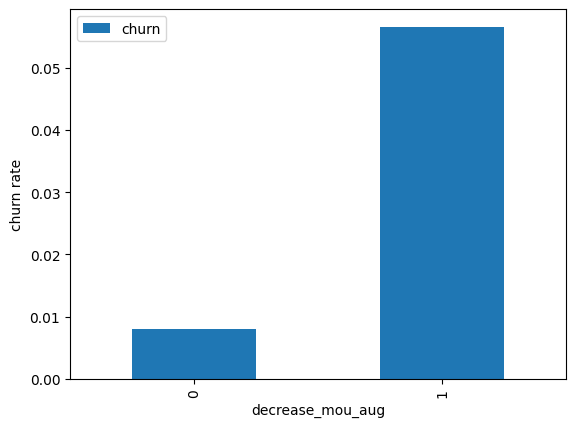

In [41]:
clean_df.pivot_table(values='churn', index='decrease_mou_aug', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

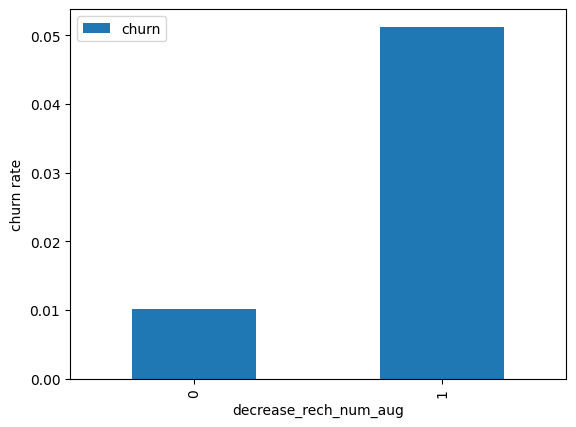

In [42]:
clean_df.pivot_table(values='churn', index='decrease_rech_num_aug', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

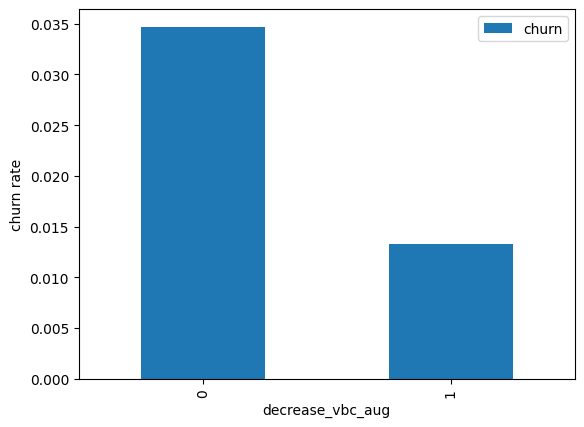

In [43]:
clean_df.pivot_table(values='churn', index='decrease_vbc_aug', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Conclusion***
1. Where we see minutes of usage decreases compare to previous months for those customers where churn rate is high
2. We also the frequency of recharge is decreses with high churn rate
3. churn rate is more, whose volume based cost in June and july is increased. Which can be interpreted as these customers don't do the monthly recharge more when they are in the Aug (which we can be consider as Action Phase).

Compare customer's average revenue base churn

In [44]:
# Churn
churn_df = clean_df[clean_df['churn'] == 1]
# Not churn
non_churn_df = clean_df[clean_df['churn'] == 0]

print(churn_df.shape)
print(non_churn_df.shape)

(840, 147)
(24937, 147)


In [45]:
clean_df.columns.values

array(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_

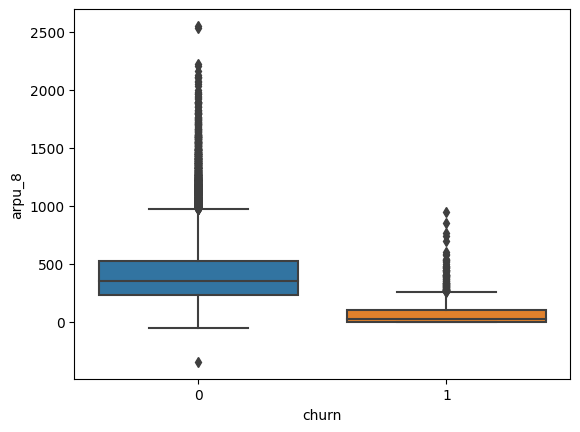

In [46]:
# Lets check the box plots for 8th month revenue to see if it can distinguish
sns.boxplot(data=clean_df, x='churn',y='arpu_8')
plt.show()

Churned customers have low revenue in aug and mean churned customers is almost zero.

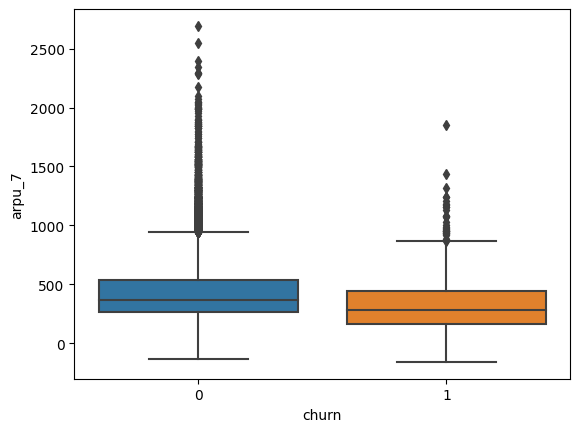

In [47]:
# Lets check the box plots for july month revenue to see if it can distinguish
sns.boxplot(data=clean_df,x='churn',y='arpu_7')
plt.show()

Here mean of churn and non-churn customers are slightly close to each other

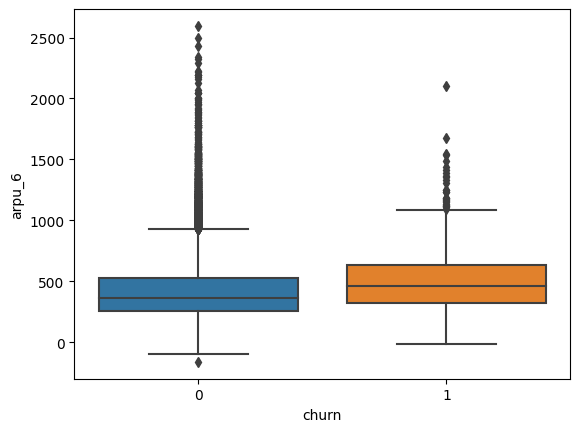

In [48]:
# Lets check the box plots for june month revenue to see if it can distinguish
sns.boxplot(data=clean_df,x='churn',y='arpu_6')
plt.show()

June month is not helpful in distinguishing the churn and non-churn customer

[Text(0.5, 0, 'Aug MOU')]

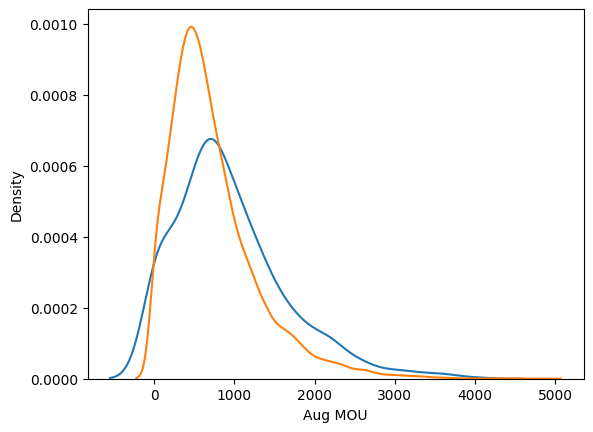

In [49]:
# Lets plot the distribution plot to see in depth
# Relate denisity total minutes of use
ax = sns.distplot(churn_df['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(non_churn_df['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Aug MOU')

[Text(0.5, 0, 'Aug average revenue per user')]

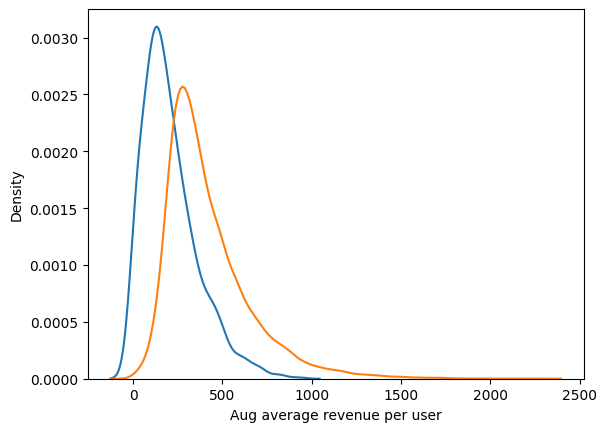

In [50]:
# Lets plot the distribution plot to see in depth 
x = sns.distplot(churn_df['avg_rev_aug'],label='churn',hist=False)
x = sns.distplot(non_churn_df['avg_rev_aug'],label='not churn',hist=False)
x.set(xlabel='Aug average revenue per user')

Churned customers is mostly densed on the 0 to 300. The higher average revenue per user customers are less likely to be churned.

### Bivariate analysis

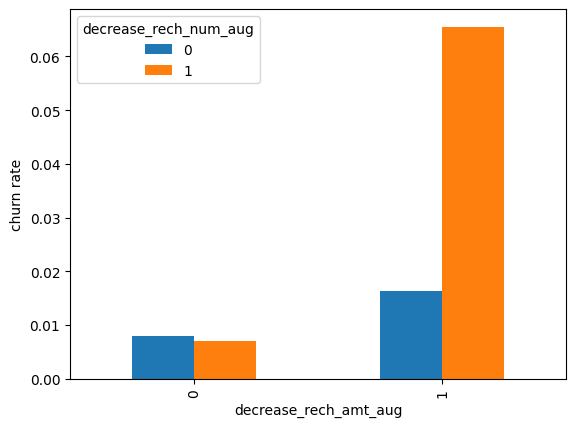

In [51]:
# Lets plot the distribution plot to see in depth
# Relate churn rate and decrease in recharge amout
clean_df.pivot_table(values='churn', index='decrease_rech_amt_aug', columns='decrease_rech_num_aug', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In Aug, we see for churning customer, there is decrease in average recharge amount and number of recharge. 

Explore more about average recharge amount and number of recharge

In [52]:
clean_df['avg_rech_amt_aug'].describe()

count    25777.000000
mean       481.469391
std        284.430930
min          0.000000
25%        290.500000
50%        412.000000
75%        602.000000
max       2838.000000
Name: avg_rech_amt_aug, dtype: float64

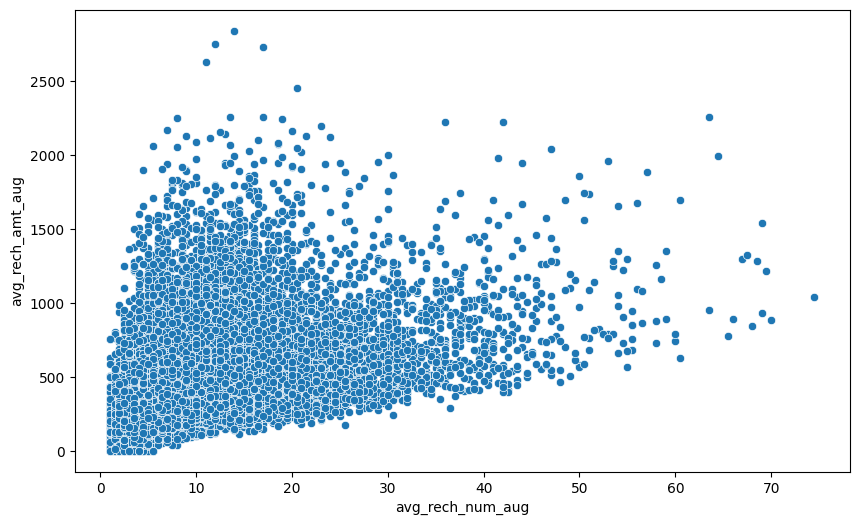

In [53]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=clean_df,x='avg_rech_num_aug',y='avg_rech_amt_aug')

Recharge number and the recharge amount are mostly propotional. Which can be said that more number of recharge, more the amount of the recharge.

In [54]:
avg_rev_per_user_df=clean_df[['arpu_6','arpu_7','arpu_8','churn']];

<AxesSubplot: >

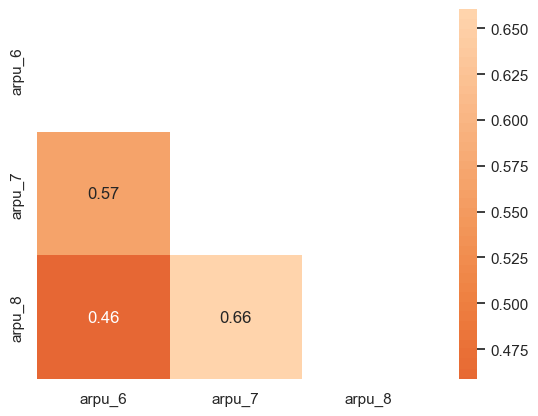

In [55]:
# Now lets check for the correlations among them
sns.set(style="white")
# Compute the correlation matrix
corr = avg_rev_per_user_df.iloc[:,:-1].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,annot=True)

Conclusion:

There is weak correlation amomg all though interpretable. There is a huge overlap of values for June,July months

In [56]:
# we don't need some variable in further analysis, sice we have some derived variables
clean_df = clean_df.drop(['total_mou_good','avg_mou_aug','diff_mou','avg_rech_num_aug','diff_rech_num','avg_rech_amt_aug',
                 'diff_rech_amt','avg_rev_aug','diff_avg_rev_aug','avg_vbc_3g_aug','diff_vbc','avg_rech_amt_6_7'], axis=1)

In [57]:
# we don't need date columns as well
date_cols = [a for a in clean_df.columns if  'date' in a]
date_cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [58]:
clean_df = clean_df.drop(date_cols, axis=1)

#### Let's analyse outgoing calls for June, july and aug

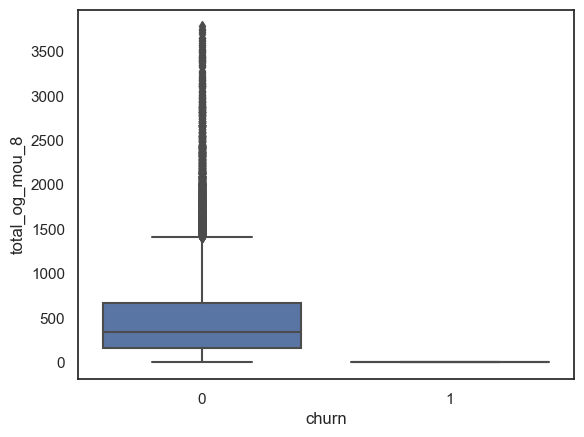

In [59]:
# Spread of values for churned and non churned customers in Aug
sns.boxplot(x='churn',y='total_og_mou_8', data=clean_df)
plt.show()

The churned customers have made very less calls compared to the non churned customers in the Aug

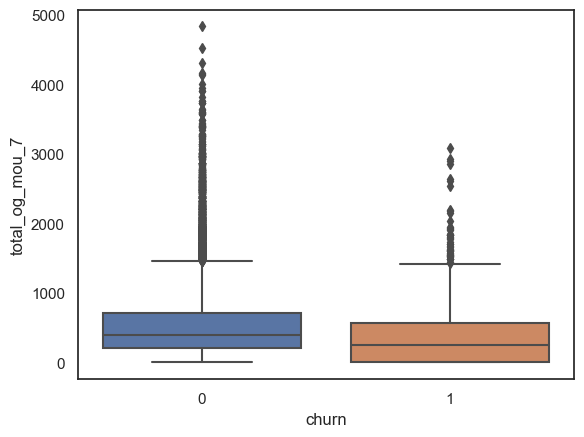

In [60]:
# Spread of values for churned and non churned customers in july
sns.boxplot(x='churn',y='total_og_mou_7', data=clean_df)
plt.show()

Outgoing calls are significatly in july more than aug 

### Model building and Test-Train Split

In [61]:
y=clean_df['churn'] # Target variable
x=clean_df.drop(columns=['id','churn'])

scaler = preprocessing.StandardScaler().fit(x)
X = scaler.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,train_size=0.7, test_size=0.3, random_state=100)

In [62]:
# Fixing data imbalance
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [63]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Decision Tree

In [64]:
depth=[1, 5, 10, 50, 100, 500, 100]
sample_split=[5, 10, 100, 500] 
param_grid = {'max_depth':depth,'min_samples_split':sample_split} 
dectree=DecisionTreeClassifier(class_weight='balanced')
#Using GridSearchCV #
model_dt1 = GridSearchCV(estimator=dectree, param_grid=param_grid, scoring = 'roc_auc', cv=5) 
model_dt1.fit(X_train,y_train) 
print(model_dt1.best_estimator_)
print(model_dt1.score(X_test, y_test))

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5)
0.9999330835117772


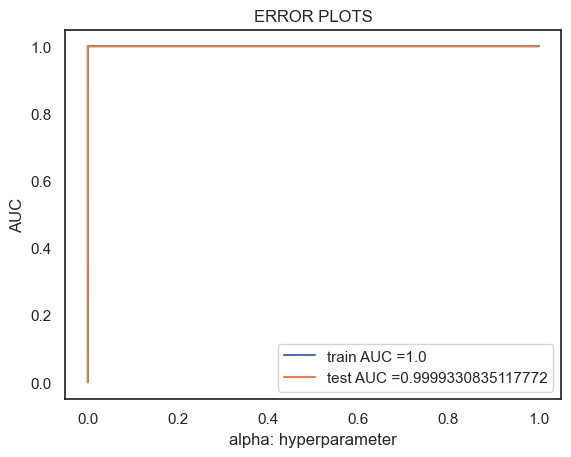

In [65]:
# Auc-error plots
y_train_proba=model_dt1.predict_proba(X_train)
y_train_proba=y_train_proba[:,1]
y_test_proba=model_dt1.predict_proba(X_test)
y_test_proba=y_test_proba[:,1]
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

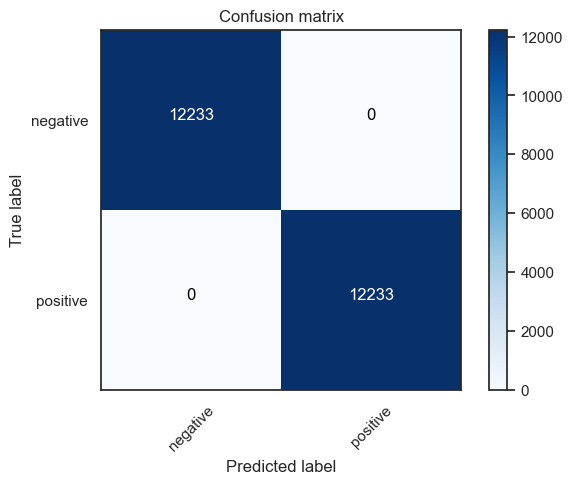

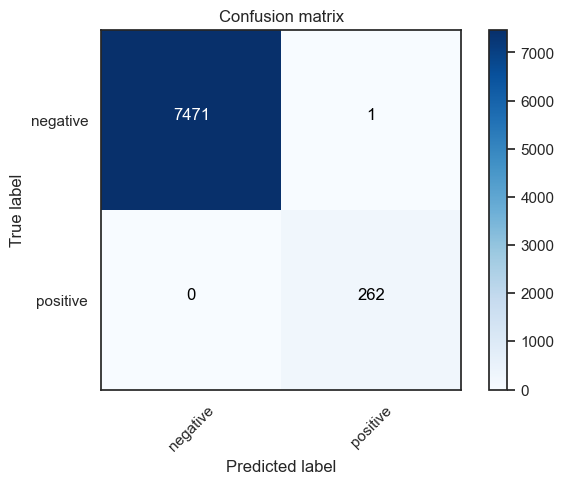

In [66]:
# Confusion Matrix
y_pred_test = model_dt1.predict(X_test)
y_pred_train=model_dt1.predict(X_train)
plot_confusion_matrix(confusion_matrix(y_train, y_pred_train), ["negative", "positive"])
plt.show()
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), ["negative", "positive"])
plt.show()

#### Random Forests

In [67]:
# Hyperparameter tuning
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [ ]:
# Optimal accuracy score and hyperparameters
print('We can see accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [68]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [69]:
# Fit the model
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

#### Predictions on the train set

In [70]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train)

In [71]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12182    51]
 [    0 12233]]


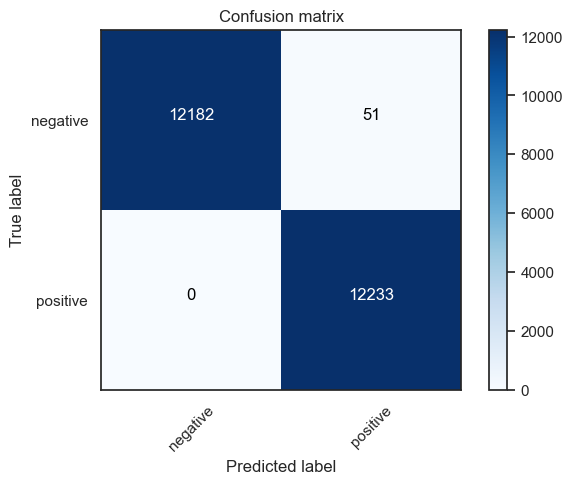

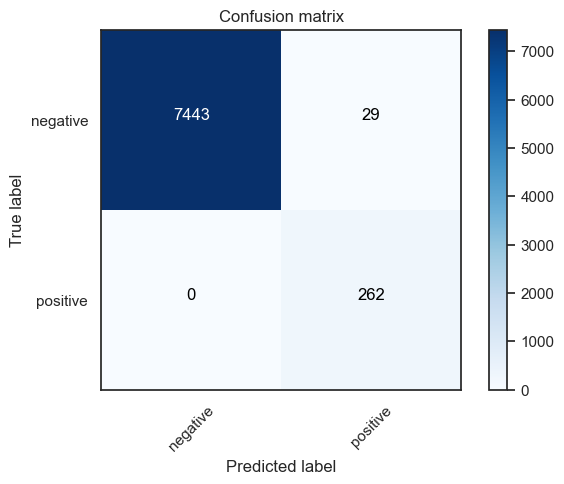

In [72]:
# Confusion Matrix
y_pred_on_train=rfc_model.predict(X_train)
plot_confusion_matrix(confusion_matrix(y_train, y_pred_on_train), ["negative", "positive"])
plt.show()

In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9962503232479959
Sensitivity:- 1.0
Specificity:- 0.9958309490721818


#### Test set prediction

In [ ]:
y_pred_on_test = rfc_model.predict(X_test)


In [ ]:

plot_confusion_matrix(confusion_matrix(y_test, y_pred_on_test), ["negative", "positive"])
plt.show()

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Conclusion

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.91
    - Specificity = 0.88
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.70
    - Specificity = 0.87
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

#### Model with PCA

In [ ]:
pca = PCA(random_state=42)
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [ ]:
# Principal components
pca.components_

array([[ 1.69915028e-02,  1.19981401e-01,  1.97144828e-01, ...,
        -1.12546498e-01,  3.94293204e-02, -1.12453430e-01],
       [ 1.79428595e-01,  1.32206165e-01,  2.69369006e-02, ...,
         4.93071989e-02, -3.09374207e-02,  4.86911073e-02],
       [ 1.18890996e-01,  1.55427885e-01,  1.22381113e-01, ...,
        -2.47978535e-02, -3.39479972e-03, -2.27244818e-02],
       ...,
       [-2.61563305e-07,  6.70170305e-07,  1.38521853e-06, ...,
        -2.61188278e-07,  2.54336477e-07,  8.39592253e-08],
       [ 1.34814864e-07, -2.46212599e-07,  7.28673648e-08, ...,
         2.10889597e-08, -3.33636808e-08,  1.90457888e-07],
       [ 1.64887983e-08,  4.51780484e-07,  3.84574021e-07, ...,
         5.61025752e-08,  6.11210715e-08, -1.07388874e-08]])

In [ ]:
# cumulative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.14256784 0.23005015 0.30175587 0.3555885  0.39751222 0.43349073
 0.4659418  0.4934661  0.51896134 0.5409451  0.55879007 0.57540997
 0.59170235 0.60699058 0.62191193 0.6360644  0.64946601 0.66203769
 0.67353218 0.68439983 0.69474747 0.70474777 0.71439315 0.72362883
 0.73258229 0.74104482 0.74918088 0.757159   0.76475573 0.77218695
 0.77940567 0.78648597 0.79332254 0.79994253 0.80620508 0.81236402
 0.81844003 0.8243106  0.83010286 0.83576243 0.84126    0.84658865
 0.85155875 0.85649763 0.86124134 0.86588334 0.87025194 0.87459337
 0.87882826 0.88302055 0.88714886 0.89116763 0.89512826 0.89904401
 0.90281159 0.90649288 0.91005988 0.91350157 0.9168267  0.92010944
 0.92329572 0.92644132 0.92951657 0.93252882 0.93543661 0.93824933
 0.94102513 0.94371228 0.94632161 0.94888777 0.95140907 0.95388301
 0.95623896 0.9585826  0.96082841 0.96304077 0.96519738 0.96724289
 0.96927435 0.97119483 0.97308536 0.97489542 0.97667433 0.97836727
 0.98001285 0.9816503  0.98323248 0.9847173  0.98616511 0.9875

Text(0, 0.5, 'Cumulative Variance')

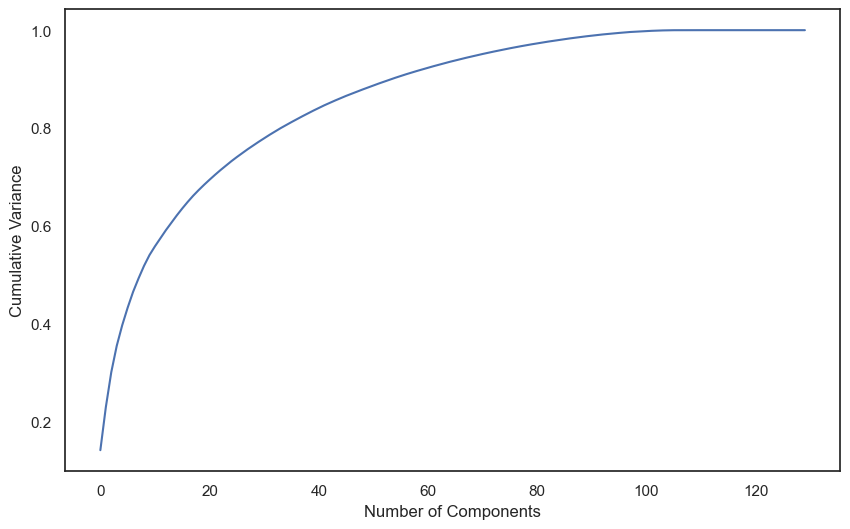

In [ ]:
# scree plot the number of the principal component versus its corresponding eigenvalue.
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components